## Reto 1: K-Medias

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de K-Medias
    
---
    
### 2. Desarrollo:

### Segmentación por subregiones de los usuarios de un producto

Tenemos un conjunto de datos llamado 'distribucion_usuarios.csv'. En este dataset tenemos las latitudes y longitudes de todos los usuarios de un producto que viven en una misma región. Como compañía, queremos establecer centros de servicio al cliente para atender todas las demandas de servicios en esta región. Vamos a utilizar el algoritmo K-Medias para segmentar nuestra región en subregiones. Cada subregión tendrá un centro de servicio en su centroide.

El dataset también contiene el código único de cada usuario y 4 columnas llamadas: 'producto_1', 'producto_2', 'producto_3', 'producto_4'. Estas columnas contienen un 1 en caso de que el usuario haya adquirido ese producto, y un 0 en caso de que el producto no haya sido adquirido.

Tu Reto consiste en lo siguiente:

1. Lee el dataset 'distribucion_usuarios.csv'.
2. Utiliza un scatterplot para visualizar las latitudes y longitudes de tu conjunto de datos.
3. Después utiliza la clase KMeans de `scikit-learn` para encontrar 7 centroides.
4. Ya que hayas encontrado tus centroides, crea una nueva visualización donde además de tus puntos, grafiques los 7 centros.
5. Ahora, utiliza tu modelo para clasificar tus puntos.
6. Después agrega segmentación por color a tu gráfica para que los puntos se coloreen de acuerdo al grupo al que pertenecen.
7. Ya que tienes tus puntos clasificados, agrega la clasificación al DataFrame original.
8. Ahora, segmenta tu DataFrame por grupo y obtén los siguientes datos:
    1. Cantidad total de usuarios por grupo
    2. Cantidades totales de producto 1, 2, 3 y 4 por grupo
9. Realiza una gráfica de barras para visualizar la cantidad de usuarios que hay en cada uno de los grupos
10. Finalmente, genera una gráfica de barras apiladas con los totales de productos adquiridos por grupo. Cada segmento de la barra será la cantidad de producto adquirido en un grupo en específico.
11. Comenta tus hallazgos con tus compañeros y la experta.

In [15]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../../Datasets/distribucion_usuarios.csv")
df.head()

codigo_de_usuario  producto_1  producto_2  producto_3  producto_4  \
0                  1           0           0           0           0   
1                  2           0           0           1           0   
2                  3           0           0           1           0   
3                  4           1           1           1           1   
4                  5           1           0           0           0   

     latitud  longitud  
0  14.277305 -5.958917  
1  -9.958963  1.036839  
2   7.859551  1.932572  
3  -8.989976  6.969268  
4  -6.641690 -0.777759

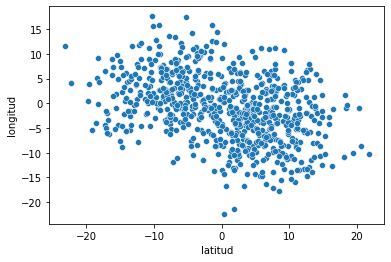

In [8]:
sb.scatterplot(x=df['latitud'],y=df['longitud']);

In [9]:
from sklearn.cluster import KMeans

In [11]:
k_means = KMeans(n_clusters=7, max_iter=10000)

In [12]:
k_means.fit(df[['latitud', 'longitud']])

KMeans(max_iter=10000, n_clusters=7)

In [13]:
centers = k_means.cluster_centers_

centers

array([[ 12.56552584,  -3.92023372],
       [ -6.49508103,   8.40016111],
       [  2.94187563,  -4.17113703],
       [-14.37998634,   0.68078241],
       [  6.83522293, -11.6214686 ],
       [  6.31906621,   4.0662904 ],
       [ -5.38217633,  -0.6177016 ]])

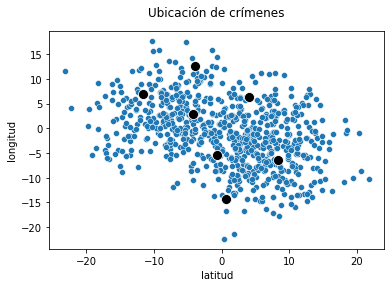

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sb.scatterplot(x=df['latitud'],y=df['longitud'], ax=ax, palette='rainbow');
sb.scatterplot(y=centers[:,0], x=centers[:,1], ax=ax, s=100, color='black');

In [18]:
clasificaciones = k_means.predict(df[['latitud', 'longitud']])

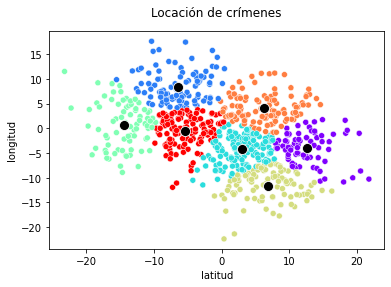

In [20]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sb.scatterplot(x=df['latitud'],y=df['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');
sb.scatterplot(x=centers[:,0],y=centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

In [22]:
df['clasificaciones'] = clasificaciones

In [23]:
df

codigo_de_usuario  producto_1  producto_2  producto_3  producto_4  \
0                    1           0           0           0           0   
1                    2           0           0           1           0   
2                    3           0           0           1           0   
3                    4           1           1           1           1   
4                    5           1           0           0           0   
..                 ...         ...         ...         ...         ...   
744                745           1           0           1           0   
745                746           0           0           1           0   
746                747           0           0           0           0   
747                748           0           0           1           0   
748                749           0           1           0           0   

       latitud  longitud  clasificaciones  
0    14.277305 -5.958917                0  
1    -9.958963  1.036839                3  
2     7.859551  1.932572                5  
3    -8.989976  6.969268                1  
4    -6.641690 -0.777759                6  
..         ...       ...              ...  
744 -15.544668 -0.881283                3  
745   3.380335  1.511268                5  
746  -0.186207 -5.689080                2  
747 -11.387520  3.761513                3  
748   5.379388 -6.009984                2  

[749 rows x 8 columns]

In [27]:
filtro = df.groupby('clasificaciones').sum()
filtro

codigo_de_usuario  producto_1  producto_2  producto_3  \
clasificaciones                                                          
0                            27168          45           9          42   
1                            39267          85           5          63   
2                            59767         100          21          66   
3                            32946          54          10          41   
4                            34193          60          13          56   
5                            41541          78           9          57   
6                            45993          88          10          59   

                 producto_4      latitud     longitud  
clasificaciones                                        
0                        15   967.545490  -301.857997  
1                        16  -707.963832   915.617561  
2                        27   432.455718  -613.157144  
3                        18 -1136.018921    53.781810  
4                        15   649.346179 -1104.039517  
5                        27   695.097284   447.291944  
6                        27  -710.447275   -81.536612

In [25]:
df

codigo_de_usuario  producto_1  producto_2  producto_3  producto_4  \
0                    1           0           0           0           0   
1                    2           0           0           1           0   
2                    3           0           0           1           0   
3                    4           1           1           1           1   
4                    5           1           0           0           0   
..                 ...         ...         ...         ...         ...   
744                745           1           0           1           0   
745                746           0           0           1           0   
746                747           0           0           0           0   
747                748           0           0           1           0   
748                749           0           1           0           0   

       latitud  longitud  clasificaciones  
0    14.277305 -5.958917                0  
1    -9.958963  1.036839                3  
2     7.859551  1.932572                5  
3    -8.989976  6.969268                1  
4    -6.641690 -0.777759                6  
..         ...       ...              ...  
744 -15.544668 -0.881283                3  
745   3.380335  1.511268                5  
746  -0.186207 -5.689080                2  
747 -11.387520  3.761513                3  
748   5.379388 -6.009984                2  

[749 rows x 8 columns]